<a href="https://colab.research.google.com/github/drshyamsundaram/CommunityDataModel/blob/gh-pages/Disease_Surveillance_Lite_POC_Final_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Disease_Surveillance_Lite_POC**
**Developer:** Dr Shyam Sundaram drshyamsundaramindia@gmail.com 


---


** Key Reference Implementations for privacy algorithms
https://github.com/Nuclearstar/K-Anonymity/blob/master/k-Anonymity.ipynb


---



#**Objective**
When pandemics strike we need to be in a position to drive policy decisions that help enable the population and communities; in specific manage health, economic and social aspects. This is a challenge since policy makers need granular action oriented data view to make action plans.

#**Suggestive End to End Approach for COVID-19**
[link text](https://drive.google.com/file/d/1bX4y1DesAv2n5GClMx7nlDaz30lQamjO/view?usp=sharing)

#**Overall High Level Approach Across ICMR Testing, State War Room Data (INDEX) & COWIN**
1. Sandbox Preprocess | Centralised - Data Collation across ICMR,COWIN, INDEX with Anonimisation Applied across key identifiers
2. Sandbox De-identifiable | Datasets with analytical relevant data points
3. Sandbox Differential Privacy | Datasets with relevant data points perturbed
4. Sandbox Advanced k-anonimity |For Model Training use cases
5. Sandbox Advanced ldiversity anomised |For Model Training use cases

#**Key linkage fields** 				
**ICMR**	icmrnumber,	icmr_patient_mobilenumber, srfnumber	

**Index**	pcnumber, apcnumber, r_srfnumber, icmrnumber

**COVIN**	cowin_registered_mobile, id_verified, uhid, beneficiary_reference_id

#**Primary Linkage Variable Nomenclature Construct** 

1. beneficiary_reference_id'-> 'pk_beneficiary_id'
2. cowin_registered_mobile'-> 'pk_mobno'
3. uhid' -> 'ref_uhid'
4. id_verified' -> 'ref_id_verified'

#**How will this benefit the India Health | Pandemic Management ?**
1. Global first technical capability that will put India on the map for advanced health management at country scale

2. Advanced incremental capability for all to adopt to leap frog innovation with privacy preserved data sharing for Machine Learning/ AI model trainining

#**Implementation Approaches**

1. Complexities will include the pre-process with bigdata enabled capability for at scale data extraction, pre-process and availability for process.

2. Enabling the complete data pre and post process at District-State Linked with ICMR & COWIN data sets for daily (or defined frequency) data cuts for enabling model builds









---


** Approach:**

The POC demonstrates the following aspects

(1) COVID Testing Data - ICMR Testing Database
(2) COWIN Vaccination Data 
(3) State War Room Data | Karnataka Index Hospitalisation Linked


---

Reference : 
1. https://uvm-plaid.github.io/programming-dp/notebooks/ch1.html
2. https://github.com/uvm-plaid/programming-dp/blob/master/notebooks/ch1.ipynb

**STEP 1:**

Code Derived from 

https://github.com/uvm-plaid/programming-dp/blob/master/notebooks/ch1.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pyspark Installations
!pip install pyspark

     |████████████████████████████████| 212.4MB 71kB/s 
     |████████████████████████████████| 204kB 17.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=6ded6bb136fc4da5c360b2aa7bb7fbe563cac7bd296bfd78993b27575b704d89
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [ ]:
#Crirical Library Imports
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import sha2, concat_ws # Hashing Related functions
import numpy as np # used for Differential Privacy computations
import pandas as pd

In [ ]:
spark = SparkSession.builder.appName('Disease_Surveillance_Lite_POC').getOrCreate()

In [ ]:
icmr_mockdata_testing= spark.read.csv(
    "/content/drive/MyDrive/Covid19_Data_Model/DSLite/Disease_Surveillance_Lite_POC_Data-icmr_mockdata_testing.csv", 
    header=True, 
    inferSchema=True,
    mode="DROPMALFORMED"
)

ka_index_hbms= spark.read.csv(
    "/content/drive/MyDrive/Covid19_Data_Model/DSLite/Disease_Surveillance_Lite_POC_Data-ka_index_hbms.csv", 
    header=True, 
    inferSchema=True,
    mode="DROPMALFORMED"
)

ka_index_hbms_chpatients= spark.read.csv(
    "/content/drive/MyDrive/Covid19_Data_Model/DSLite/Disease_Surveillance_Lite_POC_Data-ka_index_hbms_chpatients.csv", 
    header=True, 
    inferSchema=True,
    mode="DROPMALFORMED"
)

ka_index_hbms_cpatients= spark.read.csv(
    "/content/drive/MyDrive/Covid19_Data_Model/DSLite/Disease_Surveillance_Lite_POC_Data-ka_index_hbms_cpatients.csv", 
    header=True, 
    inferSchema=True,
    mode="DROPMALFORMED"
)

ka_index_hbms_rhospitals= spark.read.csv(
    "/content/drive/MyDrive/Covid19_Data_Model/DSLite/Disease_Surveillance_Lite_POC_Data-ka_index_hbms_rhospitals.csv", 
    header=True, 
    inferSchema=True,
    mode="DROPMALFORMED"
)

cowin_sample_data = spark.read.csv(
    "/content/drive/MyDrive/Covid19_Data_Model/DSLite/Disease_Surveillance_Lite_POC_Data-cowin_vaccine_sample_data.csv", 
    header=True, 
    inferSchema=True,
    mode="DROPMALFORMED"
)



In [ ]:
# Display Sample Loaded Data
'''
icmr_mockdata_testing.show()
ka_index_hbms.show()
ka_index_hbms_chpatients.show()
ka_index_hbms_cpatients.show()
ka_index_hbms_rhospitals.show()
cowin_sample_data.show()
'''

'\nicmr_mockdata_testing.show()\nka_index_hbms.show()\nka_index_hbms_chpatients.show()\nka_index_hbms_cpatients.show()\nka_index_hbms_rhospitals.show()\ncowin_sample_data.show()\n'

In [ ]:
# Print Schema
'''
print("icmr_mockdata_testing:",icmr_mockdata_testing.printSchema())
print("ka_index_hbms:",ka_index_hbms.printSchema())
print("ka_index_hbms_chpatients:",ka_index_hbms_chpatients.printSchema())
print("ka_index_hbms_cpatients:",ka_index_hbms_cpatients.printSchema())
print("ka_index_hbms_rhospitals",ka_index_hbms_rhospitals.printSchema())
'''

'\nprint("icmr_mockdata_testing:",icmr_mockdata_testing.printSchema())\nprint("ka_index_hbms:",ka_index_hbms.printSchema())\nprint("ka_index_hbms_chpatients:",ka_index_hbms_chpatients.printSchema())\nprint("ka_index_hbms_cpatients:",ka_index_hbms_cpatients.printSchema())\nprint("ka_index_hbms_rhospitals",ka_index_hbms_rhospitals.printSchema())\n'

**STAGE 1 - Linking Data Stage #1 (ICMR & Index)**

In [ ]:
# Step 1A : ICMR Base Test Data 
# Changing the column names for primary and reference keys
sandbox_icmr=icmr_mockdata_testing
sandbox_icmr = sandbox_icmr.withColumnRenamed('icmrnumber', 'pk_icmrno')
sandbox_icmr = sandbox_icmr.withColumnRenamed('icmr_patient_mobilenumber', 'pk_mobno')
sandbox_icmr = sandbox_icmr.withColumnRenamed('srfnumber', 'ref_srfno')


for i in sandbox_icmr.columns:
  if i not in ['pk_icmrno','pk_mobno', 'ref_srfno']:
    sandbox_icmr = sandbox_icmr.withColumnRenamed(i,'icmr_'+i)
sandbox_icmr.show()

+---------+----------+-------------+---------------------+-----------------------+--------------------+-------------+-------------------------------+----------------------------+------------+
|pk_icmrno|  pk_mobno|    ref_srfno|icmr_a_icmr_test_type|icmr_a_icmr_test_result|icmr_a_test_ct_value|icmr_a_lab_id|icmr_a_sample_genetic_sequenced|icmr_a_sample_genetic_strain|icmr_pupdate|
+---------+----------+-------------+---------------------+-----------------------+--------------------+-------------+-------------------------------+----------------------------+------------+
|112233441|1199999999|1122334455660|               RT-PCR|                   true|                  23|          545|                          false|                          NA|  14/06/2020|
|112233442|1299999999|1122334455661|               RT-PCR|                  false|                  11|         1690|                          false|                          NA|  09/01/2021|
|112233443|1399999999|1122334455662|    

In [ ]:
# Step 1B - Centralised Hashing on sandbox_icmr on key primary keys
# Hashed : pk_mobno_hashed,ref_srfno_hashed,pk_icmrno_hashed
#sandbox_icmr_anon = sandbox_icmr.withColumn('pk_mobno_hashed', sha2(concat_ws("", sandbox_icmr.pk_mobno),256)).withColumn("ref_srfno_hashed", sha2(concat_ws("", sandbox_icmr.ref_srfno),256)).withColumn("pk_icmrno_hashed", sha2(concat_ws("", sandbox_icmr.pk_icmrno),256)).drop("pk_mobno").drop("ref_srfno").drop("pk_icmrno").show(truncate=False)
sandbox_icmr_anon = sandbox_icmr.withColumn('pk_mobno_hashed', sha2(concat_ws("", sandbox_icmr.pk_mobno),256)).withColumn("ref_srfno_hashed", sha2(concat_ws("", sandbox_icmr.ref_srfno),256)).withColumn("pk_icmrno_hashed", sha2(concat_ws("", sandbox_icmr.pk_icmrno),256)).drop("pk_mobno").drop("ref_srfno").drop("pk_icmrno").cache()

In [ ]:
# Step 1C : Example KA HBMS Index Base Test Data 
# Changing the column names for primary and reference keys

sandbox_hbms=ka_index_hbms
sandbox_hbms = sandbox_hbms.withColumnRenamed('icmrnumber', 'pk_icmrno')
sandbox_hbms = sandbox_hbms.withColumnRenamed('pcnumber', 'pk_mobno')
sandbox_hbms = sandbox_hbms.withColumnRenamed('r_srfnumber', 'ref_srfno')
sandbox_hbms = sandbox_hbms.withColumnRenamed('bucode', 'ref_bucode')
sandbox_hbms = sandbox_hbms.withColumnRenamed('pname', 'ref_pname')

sandbox_hbms.show()


for i in sandbox_hbms.columns:
  if i not in ['pk_icmrno','pk_mobno', 'ref_srfno','ref_bucode']:
    sandbox_hbms = sandbox_hbms.withColumnRenamed(i,'index_'+i)
sandbox_hbms.show()


+----------+----------+---------+----------+---------+-------------+---------+----------+---------+-------+--------+----------+--------------------+---------+-----+---------+---------+-----+------+------+-------+--------+---------+-------+--------+---------+-----+------------------+--------------------+-----+--------+------+----------+--------+----------+----------+------+-----------+---------+--------+-------+-------+---+----+-------+---------+---------------+--------------------+---------+------------+---------------+-------+-------+-------+------+--------+-----------+----------------+------+-------------------+----------------+----------------+------+----------------+----------------+----------------+----------------+----------+------+-------+--------+---------+-----+-------+
|idcpatient| ref_pname|acategory|  pk_mobno|apcnumber|    ref_srfno|pk_icmrno|ref_bucode|pcategory|pcvalue|trbucode|commstatus|              commby|dristatus|driby|vehnumber|hosstatus|hosby|padone|padate|pstatu

In [ ]:
# Step 1D - Centralised Hashing on sandbox_icmr & sandbox_index on key primary keys
# Hashed : pk_icmrno_hashed, ref_srfno_hashed,pk_mobno_hashed,ref_bucode_hashed
sandbox_hbms_anon = sandbox_hbms.withColumn('pk_icmrno_hashed', sha2(concat_ws("", sandbox_hbms.pk_icmrno),256)).withColumn("ref_srfno_hashed", sha2(concat_ws("", sandbox_hbms.ref_srfno),256)).withColumn("pk_mobno_hashed", sha2(concat_ws("", sandbox_hbms.pk_mobno),256)).withColumn("ref_bucode_hashed", sha2(concat_ws("", sandbox_hbms.ref_bucode),256)).drop("pk_mobno").drop("ref_srfno").drop("pk_icmrno").drop("ref_bucode").cache()

In [ ]:
# Step 1E - Linking the ICMR & Index Hashed (Proof it works)
# sandbox_icmr_anon Hashed : pk_mobno_hashed,ref_srfno_hashed,pk_icmrno_hashed
# sandbox_hbms_anon Hashed : pk_mobno_hashed,ref_srfno_hashed,pk_icmrno_hashed,ref_bucode_hashed

# Type 1: pk_icmrno_hashed
sandbox_icmr_index_anon_merged_type1 = sandbox_icmr_anon.join(sandbox_hbms_anon, on=["pk_icmrno_hashed"], how='inner')
sandbox_icmr_index_anon_merged_type1.show()
                    
# Type 2: pk_mobno_hashed
sandbox_icmr_index_anon_merged_type2 = sandbox_icmr_anon.join(sandbox_hbms_anon, on=["pk_mobno_hashed"], how='inner')
sandbox_icmr_index_anon_merged_type2.show()

# Type 3: ref_srfno_hashed
sandbox_icmr_index_anon_merged_type3 = sandbox_icmr_anon.join(sandbox_hbms_anon, on=["ref_srfno_hashed"], how='inner')
sandbox_icmr_index_anon_merged_type3.show()

+--------------------+---------------------+-----------------------+--------------------+-------------+-------------------------------+----------------------------+------------+--------------------+--------------------+----------------+---------------+---------------+---------------+---------------+-------------+--------------+----------------+--------------------+---------------+-----------+---------------+---------------+-----------+------------+------------+-------------+--------------+---------------+-------------+--------------+---------------+-----------+------------------+--------------------+-----------+--------------+------------+-------------+--------------+-----------+------------+------------+-----------------+---------------+--------------+-------------+-------------+---------+----------+-------------+------------+---------------+--------------------+---------------+------------+---------------+-------------+-------------+-------------+------------+--------------+---------

STAGE 2 - Linking Data Stage #2 (COWIN Sandbox)

In [ ]:
# Step 2A : COWIN Base Test Data 
# Changing the column names for primary and reference keys
sandbox_covin=cowin_sample_data
sandbox_covin = sandbox_covin.withColumnRenamed('beneficiary_reference_id', 'pk_beneficiary_id')
sandbox_covin = sandbox_covin.withColumnRenamed('cowin_registered_mobile', 'pk_mobno')
sandbox_covin = sandbox_covin.withColumnRenamed('uhid', 'ref_uhid')
sandbox_covin = sandbox_covin.withColumnRenamed('id_verified', 'ref_id_verified')


for i in sandbox_covin.columns:
  if i not in ['pk_beneficiary_id','pk_mobno', 'ref_uhid','ref_id_verified']:
    sandbox_covin = sandbox_covin.withColumnRenamed(i,'cowin_'+i)
sandbox_covin.show()

+----------+----------------------+---------+------------+--------------------+-----------------+-------------------+------------------+-----------------+----------------------+----------------------+-----------------+----------------------+----------------------+-------------+
|  pk_mobno|cowin_beneficiary_name|cowin_age|cowin_gender|     ref_id_verified|         ref_uhid|  pk_beneficiary_id|cowin_vaccine_name|cowin_dose_1_date|cowin_d1_vaccinated_by|cowin_d1_vaccinated_at|cowin_dose_2_date|cowin_d2_vaccinated_by|cowin_d2_vaccinated_at|cowin_pupdate|
+----------+----------------------+---------+------------+--------------------+-----------------+-------------------+------------------+-----------------+----------------------+----------------------+-----------------+----------------------+----------------------+-------------+
|1199999999|             ABC1 DEF1|       86|           M|Aadhaar #XXXXXXXX...|11-1111-1111-1111| 1.1111111111111E13|        COVISHIELD|       13/05/2020|         

In [ ]:
# Step 2B - Centralised Hashing on COWIN on key primary keys
# Hashed : pk_beneficiary_id, pk_mobno, ref_uhid,ref_id_verified
sandbox_covin_anon = sandbox_covin.withColumn('pk_beneficiary_id_hashed', sha2(concat_ws("", sandbox_covin.pk_beneficiary_id),256)).withColumn("ref_uhid_hashed", sha2(concat_ws("", sandbox_covin.ref_uhid),256)).withColumn("pk_mobno_hashed", sha2(concat_ws("", sandbox_covin.pk_mobno),256)).withColumn("ref_id_verified_hashed", sha2(concat_ws("", sandbox_covin.ref_id_verified),256)).drop("pk_mobno").drop("pk_beneficiary_id").drop("ref_uhid").drop("ref_id_verified").cache()

In [ ]:
# Step 2C - Linking the ICMR & Index & COWIN Hashed (Proof it works)
# sandbox_icmr_anon Hashed : pk_mobno_hashed,ref_srfno_hashed,pk_icmrno_hashed
# sandbox_hbms_anon Hashed : pk_mobno_hashed,ref_srfno_hashed,pk_icmrno_hashed,ref_bucode_hashed
# sandbox_covin_anon Hashed : pk_beneficiary_id_hashed, pk_mobno_hashed, ref_uhid_hashed,ref_id_verified_hashed

# Type 4: pk_mobno_hashed (ICMR & COWIN)
sandbox_icmr_cowin_anon_merged_type4 = sandbox_icmr_anon.join(sandbox_covin_anon, on=["pk_mobno_hashed"], how='inner')
sandbox_icmr_cowin_anon_merged_type4.show()

# Type 5: pk_mobno_hashed (COWIN & INDEX)
sandbox_cowin_index_anon_merged_type5 = sandbox_icmr_anon.join(sandbox_hbms_anon, on=["pk_mobno_hashed"], how='inner')
sandbox_cowin_index_anon_merged_type5.show()

+--------------------+---------------------+-----------------------+--------------------+-------------+-------------------------------+----------------------------+------------+--------------------+--------------------+----------------------+---------+------------+------------------+-----------------+----------------------+----------------------+-----------------+----------------------+----------------------+-------------+------------------------+--------------------+----------------------+
|     pk_mobno_hashed|icmr_a_icmr_test_type|icmr_a_icmr_test_result|icmr_a_test_ct_value|icmr_a_lab_id|icmr_a_sample_genetic_sequenced|icmr_a_sample_genetic_strain|icmr_pupdate|    ref_srfno_hashed|    pk_icmrno_hashed|cowin_beneficiary_name|cowin_age|cowin_gender|cowin_vaccine_name|cowin_dose_1_date|cowin_d1_vaccinated_by|cowin_d1_vaccinated_at|cowin_dose_2_date|cowin_d2_vaccinated_by|cowin_d2_vaccinated_at|cowin_pupdate|pk_beneficiary_id_hashed|     ref_uhid_hashed|ref_id_verified_hashed|
+-------

In [ ]:
# Step 2D - Linking the ICMR & Index & COWIN Hashed (Proof it works)

sandbox_icmr_anon.createOrReplaceTempView("ICMR")
sandbox_hbms_anon.createOrReplaceTempView("INDEX")
sandbox_covin_anon.createOrReplaceTempView("COWIN")

select_query = "select * from ICMR e, INDEX d, COWIN a " + "where e.pk_mobno_hashed == d.pk_mobno_hashed and e.pk_mobno_hashed == a.pk_mobno_hashed"
sandbox_icmr_covin_index_anon=spark.sql(select_query).cache()
sandbox_icmr_covin_index_anon.toPandas().to_csv('sandbox_poc_v1_icmr_covin_index_anon.csv')

** Next Stage Discussion **
1. Stage 3 : Creation of non PII linked data sets (with data stamps) for dashboards and analytics
2. Stage 4: Aggregation / Summarised Views (Business Analtics Tools Driven)
3. Exposing the Stage 3 and Stage 4 | Privacy Preseervation
3.1 Anonimisation (k, etc.)
3.2 Hyper parameterise the Trust Levels/ Usage Intent
3.2.1 Dashboards - HQ | High epsilon DF
3.2.2 Models - Low Trust (low Epsilon) | Medium Trust (Medium Epsilon) | Low Trust (Trust Epsilon)

**Summary** 


---


We have demonstrated the POC capability of how we can 

(1) Centralise hashing at the source (ICMR, INDEX, COWIN)

(2) Creation of Linked Capability - Hashed 

(3) Query By Hashed values across (ICMR, INDEX, COWIN)

---





# **Part 2.** POC of Compleletely Analytical INDEX (with COWIN & ICMR) Data Model ALL indentifiers removed 
# **Data Object Name** : sandbox_icmr_covin_index_without_key_identifiers 


---

# **Notes**
1. Analytical models are required to perform analysis basis "pudate"
2. Specific query linkages of relevant fields are to be factored as per the use case 
2. Privacy preservation of variables have not yet been applied.
3. Data Dictionary | Usage guidelines of fields to be provided


In [ ]:
# Step 1 : Creating RAW without Identifier for Dashboards UpdateDate (example : sandbox_hbms.pudate)
sandbox_icmr_covin_index_without_key_identifiers =sandbox_icmr_covin_index_anon.drop("pk_mobno_hashed").drop("ref_srfno_hashed").drop("pk_icmrno_hashed").drop("index_idcpatient").drop("index_pname").drop("index_commby").drop("Central Warroom 3").drop("index_paddress").drop("index_phcname").drop("pk_icmrno_hashed").drop("pk_mobno_hashed").drop("ref_bucode_hashed").drop("cowin_beneficiary_name").drop("cowin_d1_vaccinated_by").drop("cowin_d1_vaccinated_at").drop("cowin_d2_vaccinated_by").drop("cowin_d2_vaccinated_at").drop("pk_beneficiary_id_hashed").drop("ref_uhid_hashed").drop("pk_mobno_hashed").drop("ref_id_verified_hashed")
sandbox_icmr_covin_index_without_key_identifiers.show()
sandbox_icmr_covin_index_without_key_identifiers.toPandas().to_csv('sandbox_poc_v1_icmr_covin_index_without_key_identifiers.csv')

+---------------------+-----------------------+--------------------+-------------+-------------------------------+----------------------------+------------+---------------+---------------+---------------+---------------+-------------+--------------+----------------+---------------+-----------+---------------+---------------+-----------+------------+------------+-------------+--------------+---------------+-------------+--------------+---------------+-----------+------------------+--------------------+-----------+--------------+------------+-------------+--------------+-----------+------------+------------+-----------------+---------------+--------------+-------------+-------------+---------+----------+-------------+------------+---------------+---------------+------------+---------------+-------------+-------------+-------------+------------+--------------+-----------------+----------------+------------+-------------------+----------------+----------------+------------+----------------

In [ ]:
# Print the schema
#sandbox_icmr_covin_index_without_key_identifiers.printSchema()
from pyspark.sql.functions import col , column
sandbox_icmr_covin_index_without_key_identifiers = sandbox_icmr_covin_index_without_key_identifiers.withColumn("icmr_a_test_ct_value", col("icmr_a_test_ct_value").cast("double"))
sandbox_icmr_covin_index_without_key_identifiers.printSchema()

root
 |-- icmr_a_icmr_test_type: string (nullable = true)
 |-- icmr_a_icmr_test_result: boolean (nullable = true)
 |-- icmr_a_test_ct_value: double (nullable = true)
 |-- icmr_a_lab_id: integer (nullable = true)
 |-- icmr_a_sample_genetic_sequenced: boolean (nullable = true)
 |-- icmr_a_sample_genetic_strain: string (nullable = true)
 |-- icmr_pupdate: string (nullable = true)
 |-- index_ref_pname: string (nullable = true)
 |-- index_acategory: string (nullable = true)
 |-- index_apcnumber: string (nullable = true)
 |-- index_pcategory: string (nullable = true)
 |-- index_pcvalue: string (nullable = true)
 |-- index_trbucode: string (nullable = true)
 |-- index_commstatus: string (nullable = true)
 |-- index_dristatus: string (nullable = true)
 |-- index_driby: string (nullable = true)
 |-- index_vehnumber: string (nullable = true)
 |-- index_hosstatus: string (nullable = true)
 |-- index_hosby: string (nullable = true)
 |-- index_padone: string (nullable = true)
 |-- index_padate: str

# **Part 3.** POC of Differential Privacy Based Approach for Values (WIP)
# **Data Object Name** : sandbox_icmr_covin_index_without_key_identifiers_diffpriv 


In [ ]:
#float(df.describe("A").filter("summary = 'max'").select("A").first().asDict()['A'])
max_ct_value= float(sandbox_icmr_covin_index_without_key_identifiers.describe("icmr_a_test_ct_value").filter("summary = 'max'").select("icmr_a_test_ct_value").first().asDict()['icmr_a_test_ct_value'])

In [ ]:
# perturbed
# icmr_a_test_ct_value,index_page, cowin_age
def computePerturb(val):
  """This function returns the absolute
  value of the entered number"""
  parameter_epsilon=0.7
  parameter_max_randval=100
  parameter_n=1
  derived_sensitivity=max_ct_value # max value of the ct_value - Needs to be processed variable specific (to think through)
  # Adding laplace noise parameter
  computed_scale = derived_sensitivity/parameter_epsilon
  #computed_perturb=val +np.random.laplace(0,computed_scale,parameter_n)
  computed_perturb=int(val) + np.random.laplace(0,computed_scale,parameter_n).tolist()[0]
  #print("retval=",computed_perturb)
  return computed_perturb

  """ Converting function to UDF """
#computePerturbUDF = udf(lambda z: computePerturb(z),DoubleType())
computePerturbUDF = udf(computePerturb, StringType())

In [ ]:
test=computePerturb(100) # Working Fine
print(test)

114.47974571347295


In [ ]:
# UDF errors - Needs Debuging
sandbox_icmr_covin_index_diffpriv=sandbox_icmr_covin_index_without_key_identifiers
#df_udf_test.show()
sandbox_icmr_covin_index_diffpriv_final=sandbox_icmr_covin_index_diffpriv.withColumn("icmr_a_test_ct_value_dfp", computePerturbUDF(col('icmr_a_test_ct_value'))).withColumn("cowin_age_dfp", computePerturbUDF(col('cowin_age'))).drop("icmr_a_test_ct_value").drop("cowin_age")
sandbox_icmr_covin_index_diffpriv_final.show()
sandbox_icmr_covin_index_diffpriv_final.toPandas().to_csv('sandbox_icmr_covin_index_diffpriv_final.csv')

# sandbox_icmr_covin_index_diffpriv_final.createOrReplaceTempView("COVID_ANALYTICAL_MODEL_DFPV")

+---------------------+-----------------------+-------------+-------------------------------+----------------------------+------------+---------------+---------------+---------------+---------------+-------------+--------------+----------------+---------------+-----------+---------------+---------------+-----------+------------+------------+-------------+--------------+---------------+-------------+--------------+---------------+-----------+------------------+--------------------+-----------+--------------+------------+-------------+--------------+-----------+------------+------------+-----------------+---------------+--------------+-------------+-------------+---------+----------+-------------+------------+---------------+---------------+------------+---------------+-------------+-------------+-------------+------------+--------------+-----------------+----------------+------------+-------------------+----------------+----------------+------------+----------------+----------------+---

#**Part 4 : K anonymity and L-diversity WIP** 

**What is K anonymity and L-diversity?**
One definition is called k-Anonymity and states that every individual in one generalized block is indistinguishable from at least k - 1 other individuals. l-Diversity uses a stronger privacy definition and claims that every generalized block has to contain at least l different sensitive values.


---
**k-anonymity** protects the privacy of individual persons by pooling their attributes into groups of at least $k$ people. The method is based on the assumption that we have a dataset that contains $N$ entries. Each entry consists of a list of $D$ attributes $X_i$ ($i \in [0,D]$) that contain (non-sensitive) information about a person, such as age, gender, zip code of residence, etc. 

*These attributes are called "quasi-identifiers", as combining several of them into a "super-identifier" can often uniquely identify a person even in large datasets (e.g. the combination of gender, age and zip code might be so specific that only a single person in a dataset has a given combination).* 

In addition, the model assumes that the dataset contains a single sensitive attribute that contains e.g. information about a person's income and that we want to protect. The method can also be generalized to datasets with more than one sensitive attribute or datasets where there's no clear distinction between quasi-identifiers and sensitive attributes. For this case study we will look at the simple case though.

**Now, k-anonymity demands that we group individual rows/persons of our dataset into group of at least $k$ rows/persons and replace the quasi-identifier attributes of these rows with aggregate quantities, such that it is no longer possible to read the individual values. This protects people by ensuring that an adversary who knows all values of a person's quasi-identifier attributes can only find out which group a person might belong to but not know if the person is really in the dataset.**

**A large problem of this approach is that it might happen that all people in a k-anonymous group possess the same value of the sensitive attribute.** 
An adversary who knows that a person is in that k-anonymous group can then still learn the value of the sensitive attribute of that person with absolute certainty. **This problem can be fixed by using an extension of k-anonymity called "l-diversity": l-diversity ensures that each k-anonymous group contains at least l different values of the sensitive attribute. Therefore, evne if an adversary can identify the group of a person he/she still would not be able to find out the value of that person's sensitive attribute with certainty.**

However, even when using l-diversity an adversary could still learn some information about a person's sensitive attribute using probabilistic reasoning: If, for example, 4 out of 5 people in a 5-anonymous group possess a given value of the sensitive attribute, an attacker can reason that a given person who he/she knows is part of the group will -with high probability- possess that value. 

**Again, this problem can be fixed by extending k-anonymity using a so-called "t-closeness" criterion: t-closeness demands that the statistical distribution of the sensitive attribute values in each k-anonymous group is "close" to the overall distribution of that attribute in the entire dataset.** 
Typically, the closeness can be measured using e.g. the Kullback-Leibler (KL) divergence. An adversary could then only learn a limited amount of information from comparing the distribution of the values in the group to the distribution in the entire dataset.

**Of course, k-anonymity, l-diversity and t-closeness all limit the amount of information that a legitimate user can learn from the data as well, so typically we need to balance the degree of privacy against the utility of the resulting data.**

Reference : https://github.com/Nuclearstar/K-Anonymity



##**Part 4a: K-anonymity**

**Base Dataset:**sandbox_icmr_covin_index_without_key_identifiers

**Technical Notes**

Also since many of the code fragments and implementations are Pandas based, we will be using the Pandas DF (meaning we have converted the Spark DF -> Pandas DF

Reference: https://github.com/Nuclearstar/K-Anonymity/blob/master/k-Anonymity.ipynb

In [ ]:
# Schema Check : sandbox_icmr_covin_index_without_key_identifiers
# sandbox_icmr_covin_index_without_key_identifiers.printSchema()

In [ ]:
# Convert Spark DF sandbox_icmr_covin_index_without_key_identifiers into Pandas for k-anonimity process
sandbox_icmr_covin_index_without_key_identifiers_pandas= sandbox_icmr_covin_index_without_key_identifiers.toPandas()
sandbox_icmr_covin_index_without_key_identifiers_pandas

,icmr_a_icmr_test_type,icmr_a_icmr_test_result,icmr_a_test_ct_value,icmr_a_lab_id,icmr_a_sample_genetic_sequenced,icmr_a_sample_genetic_strain,icmr_pupdate,index_ref_pname,index_acategory,index_apcnumber,index_pcategory,index_pcvalue,index_trbucode,index_commstatus,index_dristatus,index_driby,index_vehnumber,index_hosstatus,index_hosby,index_padone,index_padate,index_pstatus,index_dsummary,index_statusuby,index_ureason,index_usummary,index_padmitted,index_hcode,index_pahospital,index_tpahospital,index_htype,index_pbedcode,index_pbtype,index_pbquota,index_hosptype,index_fdate,index_todate,index_pasymp,index_dsinfection,index_pthistory,index_potravel,index_labname,index_labcode,index_pid,index_page,index_pgender,index_pstate,index_pdistrict,index_plocation,index_pzone,index_pward,index_ptaluka,index_astatus,index_anumber,index_adname,index_adnumber,index_stambulance,index_stdate,index_audate,index_cdate,index_pcdate,index_adddate,index_bmdate,index_moddate,index_admdate,index_movdate,index_disdate,index_pudate,index_cudate,index_distcode,index_distrefno,index_ptype,index_remarks,cowin_age,cowin_gender,cowin_vaccine_name,cowin_dose_1_date,cowin_dose_2_date,cowin_pupdate
0,RT-PCR,True,23.0,545,False,NA,14/06/2020,ABC1 DEF1,NULL,NULL,NULL,NULL,NULL,NA,NA,NA,NA,NA,NA,NULL,NULL,A,NULL,Warroom1,R1,NA,NA,NULL,NA,The Bangalore Hospital,HOSP,Bedcode1,NULL,GOVERNMENT,NULL,06-05-2021,13-05-2021,NA,NA,NA,NA,ABC,103,NA,57,M,KARNATAKA,null,NULL,BOMMANAHALLI,Kacharkanahalli,NULL,NULL,NULL,NULL,NULL,NULL,30-04-2021 18:49,NULL,0000-00-00 00:00:00,01-05-2021 00:19,01-05-2021 00:19,NULL,01-05-2021 08:10,01-05-2021 00:19,01-05-2021 00:19,01-05-2021 00:19,01/05/2021,NULL,NULL,NULL,NULL,NULL,86,M,COVISHIELD,13/05/2020,05/08/2020,05/06/2020
1,RT-PCR,False,11.0,1690,False,NA,09/01/2021,ABC1 DEF2,NULL,NULL,NULL,NULL,NULL,NA,NA,NA,NA,NA,NA,NULL,NULL,B,NULL,Warroom1,R2,NA,NA,NULL,NA,KIMS Hospital And Research Center,HOSP,Bedcode2,NULL,GOVERNMENT,NULL,12-05-2021,15-05-2021,NA,NA,NA,NA,NA,245,NA,36,F,NA,BENGALURU URBAN,NULL,EAST,SU,NULL,NULL,NULL,NULL,NULL,NULL,30-04-2021 18:54,NULL,0000-00-00 00:00:00,01-05-2021 00:24,01-05-2021 00:24,NULL,01-05-2021 06:40,01-05-2021 00:24,01-05-2021 00:24,01-05-2021 00:24,01/05/2021,NULL,NULL,NULL,NULL,NULL,45,F,COVAXIN,01/08/2020,24/10/2020,09/06/2020
2,RT-PCR,False,11.0,1642,False,NA,30/09/2020,ABC1 DEF3,NULL,NULL,NULL,NULL,NULL,NA,NA,NA,NA,NA,NA,NULL,NULL,A,NULL,Warroom2,R3,NA,NA,NULL,Aster CMI Hospital,Aster CMI Hospital,HOSP,Bedcode2,NULL,GOVERNMENT,NULL,01-05-2021,06-05-2021,NA,NA,NA,NA,NA,123,NA,63,M,KARNATAKA,null,NULL,YELAHANKA,SU,NULL,NULL,NULL,NULL,NULL,NULL,30-04-2021 19:01,NULL,01-05-2021 10:37,01-05-2021 00:31,01-05-2021 00:31,NULL,01-05-2021 00:33,01-05-2021 00:31,01-05-2021 00:31,01-05-2021 00:31,01/05/2021,NULL,NULL,NULL,NULL,NULL,47,M,COVISHIELD,11/02/2020,05/05/2020,24/06/2020
3,RT-PCR,False,32.0,1115,False,NA,11/12/2020,ABC1 DEF4,NULL,NULL,NULL,NULL,NULL,NA,NA,NA,NA,NA,NA,NULL,NULL,B,NULL,Warroom1,R2,NA,NA,NULL,NA,The Bangalore Hospital,HOSP,Bedcode3,NULL,GOVERNMENT,NULL,20-05-2021,28-05-2021,NA,NA,NA,NA,NA,675,NA,57,F,KARNATAKA,null,NULL,BOMMANAHALLI,SU,NULL,NULL,NULL,NULL,NULL,NULL,30-04-2021 18:49,NULL,0000-00-00 00:00:00,01-05-2021 00:19,01-05-2021 00:19,NULL,01-05-2021 08:10,01-05-2021 00:19,01-05-2021 00:19,01-05-2021 00:19,01/05/2021,NULL,NULL,NULL,NULL,NULL,45,F,COVISHIELD,19/01/2021,13/04/2021,08/06/2020
4,RT-PCR,True,11.0,602,True,ALPHA,03/03/2021,ABC1 DEF5,NULL,NULL,NULL,NULL,NULL,NA,NA,NA,NA,NA,NA,NULL,NULL,A,NULL,Warroom1,R1,NA,NA,NULL,NA,KIMS Hospital And Research Center,HOSP,Bedcode1,NULL,GOVERNMENT,NULL,12-05-2021,19-05-2021,NA,NA,NA,NA,NA,987,NA,36,F,NA,BENGALURU URBAN,NULL,EAST,Kacharkanahalli,NULL,NULL,NULL,NULL,NULL,NULL,30-04-2021 18:54,NULL,0000-00-00 00:00:00,01-05-2021 00:24,01-05-2021 00:24,NULL,01-05-2021 06:40,01-05-2021 00:24,01-05-2021 00:24,01-05-2021 00:24,01/05/2021,NULL,NULL,NULL,NULL,NULL,86,F,COVAXIN,08/04/2021,01/07/2021,08/04/2020
...,...,...,...,...,...,...,...,...

In [ ]:
#@title Default title Sample Form Options
var_int    = 15           #@param {type:"integer"}
var_float  = 0.36         #@param {type:"number"}
var_bool   = False        #@param {type:"boolean"}
var_date   = "2018-10-21" #@param {type:"date"}
var_str    = "str"        #@param {type:"string"}
var_raw    = "raw"        #@param {type:"raw"}

var_slider = 39           #@param {type:"slider", min:0, max:100, step:1}
var_enum   = "val1"       #@param ["val1", "val2", "val3"]


#**Critical Configuration** 

**Form Based Automation Sample Code** 

https://stackoverflow.com/questions/49165220/the-new-form-feature-in-google-colaboratory**

Identification of categorical sets from the base data frame sandbox_icmr_covin_index_without_key_identifiers**

In [ ]:
#@title DSM Configuration Variables (FORM Work In Progress)
var_kanon_kvalue = 3      #@param {type:"slider", min:0, max:10, step:1}
var_feature_columns   = "'icmr_a_test_ct_value','index_page'"       #@param ["'icmr_a_test_ct_value','index_page','icmr_a_sample_genetic_strain','index_hcode',''", "val2", "val3"]



In [ ]:
# this is a list of the column names in our dataset (as the file doesn't contain any headers)
reference_column_name=sandbox_icmr_covin_index_without_key_identifiers.columns

# some fields are categorical and will require special treatment
categorical = set((
'icmr_a_icmr_test_type',
'icmr_a_icmr_test_result',
'icmr_a_lab_id',
'icmr_a_sample_genetic_sequenced',
'icmr_a_sample_genetic_strain',
'icmr_pupdate',
'index_ref_pname',
'index_acategory',
'index_apcnumber',
'index_pcategory',
'index_pcvalue',
'index_trbucode',
'index_commstatus',
'index_dristatus',
'index_driby',
'index_vehnumber',
'index_hosstatus',
'index_hosby',
'index_padone',
'index_padate',
'index_pstatus',
'index_pgender',
'index_dsummary',
'index_statusuby',
'index_ureason',
'index_usummary',
'index_padmitted',
'index_hcode',
'index_pahospital',
'index_tpahospital',
'index_htype',
'index_pbedcode',
'index_pbtype',
'index_pbquota',
'index_hosptype',
'index_fdate',
'index_todate',
'index_pasymp',
'index_dsinfection',
'index_pthistory',
'index_potravel',
'index_labname',
'index_labcode',
'index_pid',
'index_pgender',
'index_pstate',
'index_pdistrict',
'index_plocation',
'index_pzone',
'index_pward',
'index_ptaluka',
'index_astatus',
'index_anumber',
'index_adname',
'index_adnumber',
'index_stambulance',
'index_stdate',
'index_audate',
'index_cdate',
'index_pcdate',
'index_adddate',
'index_bmdate',
'index_moddate',
'index_admdate',
'index_movdate',
'index_disdate',
'index_pudate',
'index_cudate',
'index_distcode',
'index_distrefno',
'index_ptype',
'index_remarks',
'cowin_gender',
'cowin_vaccine_name',
'cowin_dose_1_date',
'cowin_dose_2_date',
'cowin_pupdate'))

In [ ]:
# Defining the categorical identifed variables as type category
for reference_column_name in categorical:
    sandbox_icmr_covin_index_without_key_identifiers_pandas[reference_column_name] = sandbox_icmr_covin_index_without_key_identifiers_pandas[reference_column_name].astype('category')

#**Determining the spans of all columns**

In [ ]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe for which to calculate the spans
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    spans = {}
    for column in df.columns:
        if column in categorical:
            print("debug |cat",column)
            span = len(df[column][partition].unique())
        else:
            print("debug |noncat",column)
            print("debug| partition=",partition)
            span = df[column][partition].max()-df[column][partition].min()
        if scale is not None:
            span = span/scale[column]
        spans[column] = span
    return spans

In [ ]:
# Compute the spans for the data set
sandbox_icmr_covin_index_without_key_identifiers_pandas.index
full_spans = get_spans(sandbox_icmr_covin_index_without_key_identifiers_pandas, sandbox_icmr_covin_index_without_key_identifiers_pandas.index)
full_spans

debug |cat icmr_a_icmr_test_type
debug |cat icmr_a_icmr_test_result
debug |noncat icmr_a_test_ct_value
debug| partition= RangeIndex(start=0, stop=199, step=1)
debug |cat icmr_a_lab_id
debug |cat icmr_a_sample_genetic_sequenced
debug |cat icmr_a_sample_genetic_strain
debug |cat icmr_pupdate
debug |cat index_ref_pname
debug |cat index_acategory
debug |cat index_apcnumber
debug |cat index_pcategory
debug |cat index_pcvalue
debug |cat index_trbucode
debug |cat index_commstatus
debug |cat index_dristatus
debug |cat index_driby
debug |cat index_vehnumber
debug |cat index_hosstatus
debug |cat index_hosby
debug |cat index_padone
debug |cat index_padate
debug |cat index_pstatus
debug |cat index_dsummary
debug |cat index_statusuby
debug |cat index_ureason
debug |cat index_usummary
debug |cat index_padmitted
debug |cat index_hcode
debug |cat index_pahospital
debug |cat index_tpahospital
debug |cat index_htype
debug |cat index_pbedcode
debug |cat index_pbtype
debug |cat index_pbquota
debug |cat in

{'cowin_age': 82,
 'cowin_dose_1_date': 6,
 'cowin_dose_2_date': 6,
 'cowin_gender': 2,
 'cowin_pupdate': 6,
 'cowin_vaccine_name': 2,
 'icmr_a_icmr_test_result': 2,
 'icmr_a_icmr_test_type': 1,
 'icmr_a_lab_id': 191,
 'icmr_a_sample_genetic_sequenced': 2,
 'icmr_a_sample_genetic_strain': 2,
 'icmr_a_test_ct_value': 25.0,
 'icmr_pupdate': 147,
 'index_acategory': 1,
 'index_adddate': 3,
 'index_admdate': 3,
 'index_adname': 1,
 'index_adnumber': 1,
 'index_anumber': 1,
 'index_apcnumber': 1,
 'index_astatus': 1,
 'index_audate': 1,
 'index_bmdate': 1,
 'index_cdate': 2,
 'index_commstatus': 1,
 'index_cudate': 1,
 'index_disdate': 3,
 'index_distcode': 1,
 'index_distrefno': 1,
 'index_driby': 1,
 'index_dristatus': 1,
 'index_dsinfection': 1,
 'index_dsummary': 1,
 'index_fdate': 5,
 'index_hcode': 1,
 'index_hosby': 1,
 'index_hosptype': 1,
 'index_hosstatus': 1,
 'index_htype': 1,
 'index_labcode': 5,
 'index_labname': 2,
 'index_moddate': 3,
 'index_movdate': 3,
 'index_padate': 1,

In [ ]:
def split(df, partition, column):
    """
    :param        df: The dataframe to split
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    dfp = df[column][partition]
    if column in categorical:
        values = dfp.unique()
        lv = set(values[:len(values)//2])
        rv = set(values[len(values)//2:])
        return dfp.index[dfp.isin(lv)], dfp.index[dfp.isin(rv)]
    else:        
        median = dfp.median()
        dfl = dfp.index[dfp < median]
        dfr = dfp.index[dfp >= median]
        return (dfl, dfr)

In [ ]:
# The value of k (picked up from var_kanon_kvalue in Configuration Section slider variable) provides the minimum acceptable partition group
def is_k_anonymous(df, partition, sensitive_column, k=var_kanon_kvalue):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    if len(partition) < k:
        return False
    return True

def partition_dataset(df, feature_columns, sensitive_column, scale, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param            scale: The column spans as generated before.
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
    finished_partitions = []
    partitions = [df.index]
    while partitions:
        partition = partitions.pop(0)
        spans = get_spans(df[feature_columns], partition, scale)
        for column, span in sorted(spans.items(), key=lambda x:-x[1]):
            lp, rp = split(df, partition, column)
            if not is_valid(df, lp, sensitive_column) or not is_valid(df, rp, sensitive_column):
                continue
            partitions.extend((lp, rp))
            break
        else:
            finished_partitions.append(partition)
    return finished_partitions

#**Creating Partitions**
#**Partitioning method to two columns ('icmr_a_test_ct_value','index_page') of our dataset, using "cowin_age" as the sensitive attribute**


In [ ]:
feature_columns = ['icmr_a_test_ct_value','index_page']
sensitive_column = 'cowin_age' # need a better sensitive column
finished_partitions = partition_dataset(sandbox_icmr_covin_index_without_key_identifiers_pandas, feature_columns, sensitive_column, full_spans, is_k_anonymous)

debug |noncat icmr_a_test_ct_value
debug| partition= RangeIndex(start=0, stop=199, step=1)
debug |noncat index_page
debug| partition= RangeIndex(start=0, stop=199, step=1)
debug |noncat icmr_a_test_ct_value
debug| partition= Int64Index([  1,   2,   4,   6,   7,  10,  11,  12,  13,  14,  15,  20,  24,
             30,  32,  36,  38,  42,  43,  47,  48,  49,  52,  56,  57,  60,
             61,  65,  68,  72,  74,  75,  78,  79,  80,  81,  83,  84,  87,
             88,  92,  93,  94,  95,  96, 107, 109, 111, 114, 115, 117, 120,
            123, 124, 125, 130, 134, 135, 140, 143, 144, 146, 147, 148, 149,
            150, 152, 153, 155, 156, 158, 159, 160, 161, 162, 164, 168, 170,
            171, 172, 175, 176, 177, 178, 183, 184, 187, 188, 189, 190, 191,
            193, 194, 196, 197],
           dtype='int64')
debug |noncat index_page
debug| partition= Int64Index([  1,   2,   4,   6,   7,  10,  11,  12,  13,  14,  15,  20,  24,
             30,  32,  36,  38,  42,  43,  47,  48,  49, 

In [ ]:
len(finished_partitions)
finished_partitions

[Int64Index([16, 22, 31, 34, 51, 63, 89, 98, 101, 104, 110, 136, 142, 179], dtype='int64'),
 Int64Index([1, 4, 83, 162, 197], dtype='int64'),
 Int64Index([10, 13, 43, 115, 144, 171, 194], dtype='int64'),
 Int64Index([11, 14, 42, 84, 88, 149, 161, 170], dtype='int64'),
 Int64Index([107, 168, 176, 191], dtype='int64'),
 Int64Index([48, 72, 75, 92, 150], dtype='int64'),
 Int64Index([57, 80, 124, 147, 188], dtype='int64'),
 Int64Index([12, 56, 135, 190, 193], dtype='int64'),
 Int64Index([24, 32, 61, 65, 68, 120], dtype='int64'),
 Int64Index([46, 54, 112, 185], dtype='int64'),
 Int64Index([37, 118, 121, 127, 174, 182], dtype='int64'),
 Int64Index([25, 66, 69, 86], dtype='int64'),
 Int64Index([18, 71, 77, 132, 173, 181, 186], dtype='int64'),
 Int64Index([21, 50, 82], dtype='int64'),
 Int64Index([5, 17, 29, 44, 67, 70, 108, 113, 128, 131], dtype='int64'),
 Int64Index([7, 78, 95, 156], dtype='int64'),
 Int64Index([60, 130, 153, 159], dtype='int64'),
 Int64Index([6, 146, 155, 164], dtype='int64

In [ ]:
# Visualisations of Partitions
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [ ]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
        values = sorted(df[column].unique())
        indexes[column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

def get_partition_rects(df, partitions, column_x, column_y, indexes, offsets=[0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [ ]:
# Calculate the bounding rects of all partitions that we created
indexes = build_indexes(sandbox_icmr_covin_index_without_key_identifiers_pandas)
column_x, column_y = feature_columns[:2]
rects = get_partition_rects(sandbox_icmr_covin_index_without_key_identifiers_pandas, finished_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

In [ ]:
# let's see how our rects look like
rects[:10]

[((22.0, 36.0), (28.0, 57.0)),
 ((11.0, 36.0), (12.0, 57.0)),
 ((15.0, 36.0), (19.0, 57.0)),
 ((10.0, 57.0), (11.0, 63.0)),
 ((12.0, 36.0), (13.0, 57.0)),
 ((19.0, 36.0), (20.0, 57.0)),
 ((20.0, 36.0), (22.0, 57.0)),
 ((14.0, 57.0), (17.0, 63.0)),
 ((17.0, 57.0), (18.0, 63.0)),
 ((28.0, 36.0), (29.0, 57.0))]

In [ ]:
# Plot the rects
def plot_rects(df, ax, rects, column_x, column_y, edgecolor='black', facecolor='none'):
    for (xl, yl),(xr, yr) in rects:
        ax.add_patch(patches.Rectangle((xl,yl),xr-xl,yr-yl,linewidth=1,edgecolor=edgecolor,facecolor=facecolor, alpha=0.5))
    ax.set_xlim(*get_bounds(df, column_x, indexes))
    ax.set_ylim(*get_bounds(df, column_y, indexes))
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)

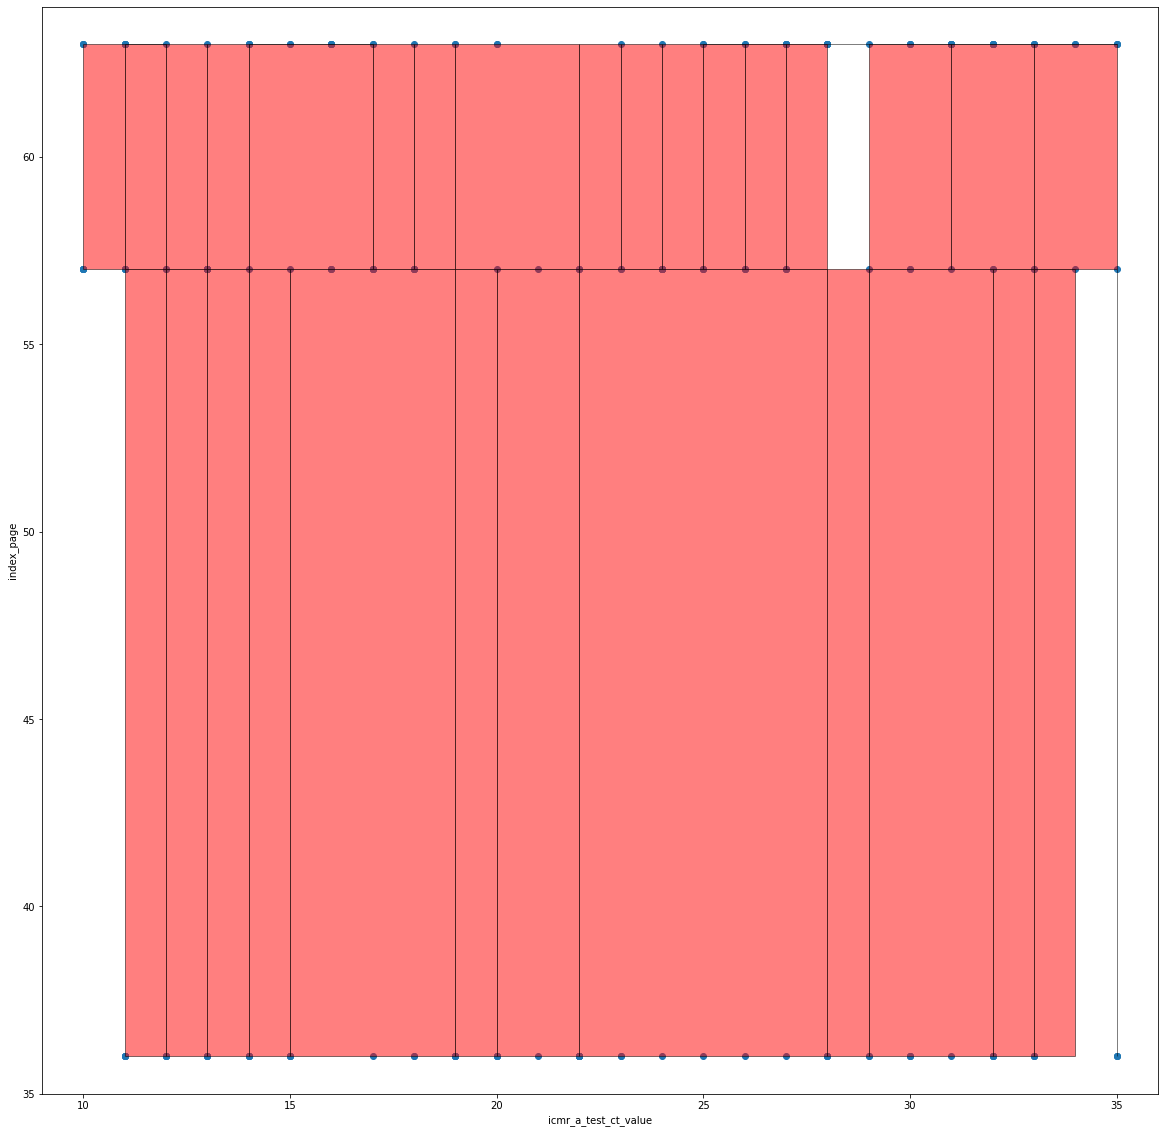

In [ ]:
# k-anonimised Plot on sandbox_icmr_covin_index_without_key_identifiers_pandas
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(sandbox_icmr_covin_index_without_key_identifiers_pandas, ax, rects, column_x, column_y, facecolor='r')
pl.scatter(sandbox_icmr_covin_index_without_key_identifiers_pandas[column_x], sandbox_icmr_covin_index_without_key_identifiers_pandas[column_y])
#pl.show()
# Saving figure by changing parameter values
pl.savefig("sandbox_icmr_covin_index_without_key_identifiers_kanon", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

#** Partition analysis on the base data set with anonimised identifiers

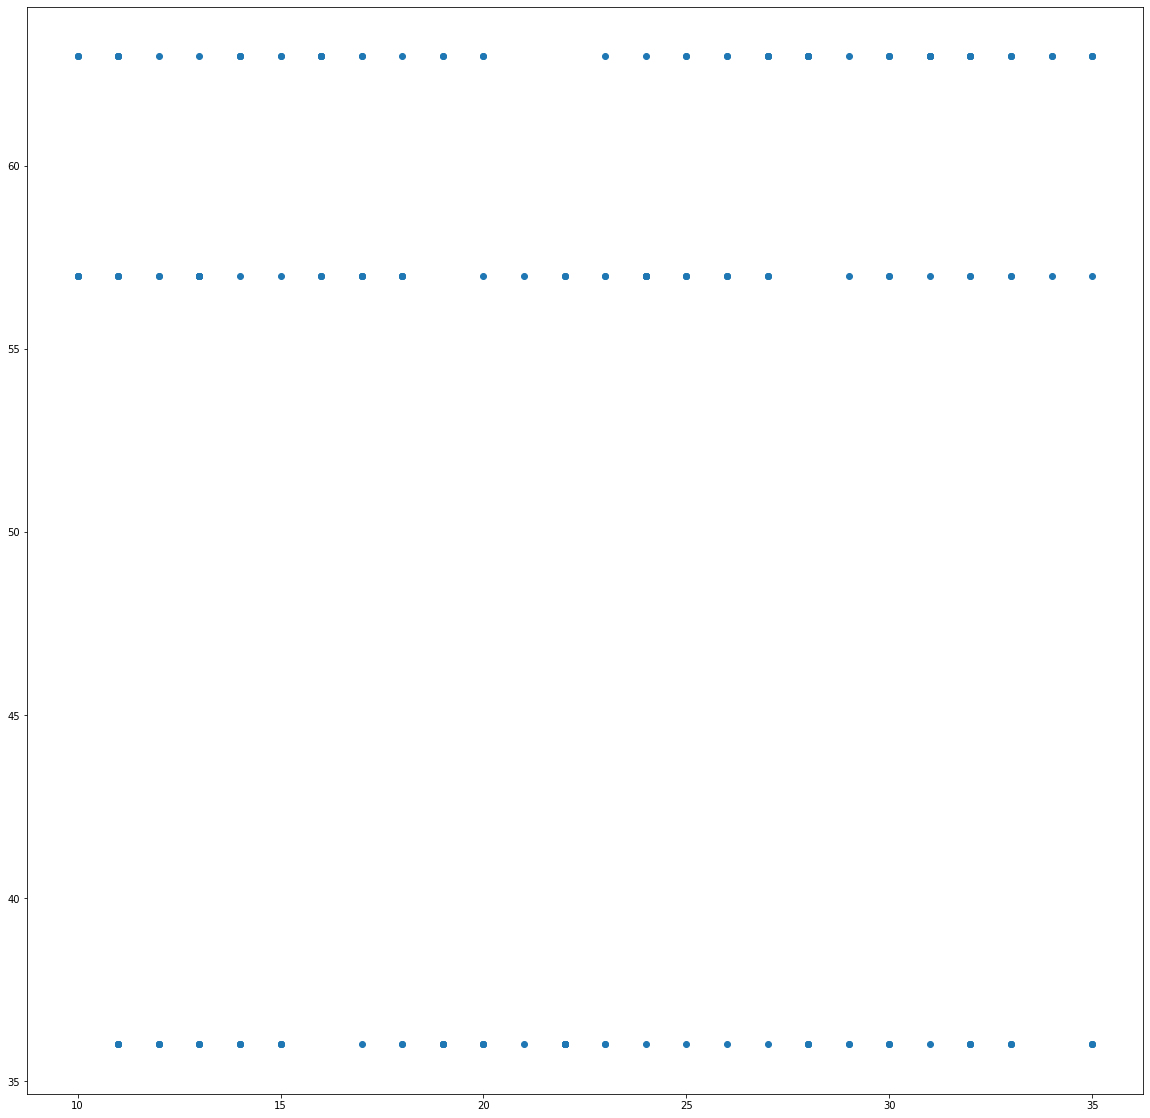

In [ ]:
# k-anonimised Plot on original sandbox_icmr_covin_index_without_key_identifiers_pandas without partitions

pl.figure(figsize=(20,20))
ax = pl.subplot(111)
#plot_rects(sandbox_icmr_covin_index_without_key_identifiers_pandas, ax, rects_original, column_x, column_y, facecolor='r')
pl.scatter(sandbox_icmr_covin_index_without_key_identifiers_pandas[column_x], sandbox_icmr_covin_index_without_key_identifiers_pandas[column_y])
#pl.show()
# Saving figure by changing parameter values
pl.savefig("sandbox_icmr_covin_index_without_key_identifiers_original", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

#**Generating an k-Anonymous Dataset**
Of course, to use the data we want to produce a new dataset that contains one row for each partition and value of the sensitive attribute. To do this, we need to aggregate the columns in each partition.

In [ ]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

In [ ]:
def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Finished {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = grouped_columns.iloc[0].to_dict()
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            rows.append(values.copy())
    return pd.DataFrame(rows)

In [ ]:
sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset = build_anonymized_dataset(sandbox_icmr_covin_index_without_key_identifiers_pandas, finished_partitions, feature_columns, sensitive_column)

Finished 1 partitions...


In [ ]:
# Sort the resulting dataframe using the feature columns and the sensitive attribute
sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset.sort_values(feature_columns+[sensitive_column])

,icmr_a_test_ct_value,index_page,cowin_age,count
24,10.0,59.25,24,1
25,10.0,59.25,37,1
26,10.0,59.25,41,1
27,10.0,59.25,43,1
28,10.0,59.25,68,1
...,...,...,...,...
194,34.6,63.00,63,1
195,34.6,63.00,73,1
143,35.0,36.00,18,1
144,35.0,36.00,61,1


In [ ]:
sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset.to_csv('sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset.csv')

##**Part 4b: Implementing l-diversity (the naive way)**

**Base Dataset:**sandbox_icmr_covin_index_without_key_identifiers_pandas

**Technical Notes**



In [ ]:
def diversity(df, partition, column):
    return len(df[column][partition].unique())

def is_l_diverse(df, partition, sensitive_column, l=2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param                l: The minimum required diversity of sensitive attribute values in the partition
    """
    return diversity(df, partition, sensitive_column) >= l

In [ ]:
# now let's apply this method to our data and see how the result changes
finished_l_diverse_partitions = partition_dataset(sandbox_icmr_covin_index_without_key_identifiers_pandas, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_l_diverse(*args))

debug |noncat icmr_a_test_ct_value
debug| partition= RangeIndex(start=0, stop=199, step=1)
debug |noncat index_page
debug| partition= RangeIndex(start=0, stop=199, step=1)
debug |noncat icmr_a_test_ct_value
debug| partition= Int64Index([  1,   2,   4,   6,   7,  10,  11,  12,  13,  14,  15,  20,  24,
             30,  32,  36,  38,  42,  43,  47,  48,  49,  52,  56,  57,  60,
             61,  65,  68,  72,  74,  75,  78,  79,  80,  81,  83,  84,  87,
             88,  92,  93,  94,  95,  96, 107, 109, 111, 114, 115, 117, 120,
            123, 124, 125, 130, 134, 135, 140, 143, 144, 146, 147, 148, 149,
            150, 152, 153, 155, 156, 158, 159, 160, 161, 162, 164, 168, 170,
            171, 172, 175, 176, 177, 178, 183, 184, 187, 188, 189, 190, 191,
            193, 194, 196, 197],
           dtype='int64')
debug |noncat index_page
debug| partition= Int64Index([  1,   2,   4,   6,   7,  10,  11,  12,  13,  14,  15,  20,  24,
             30,  32,  36,  38,  42,  43,  47,  48,  49, 

In [ ]:
len(finished_l_diverse_partitions)

40

In [ ]:
column_x, column_y = feature_columns[:2]
l_diverse_rects = get_partition_rects(sandbox_icmr_covin_index_without_key_identifiers_pandas, finished_l_diverse_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

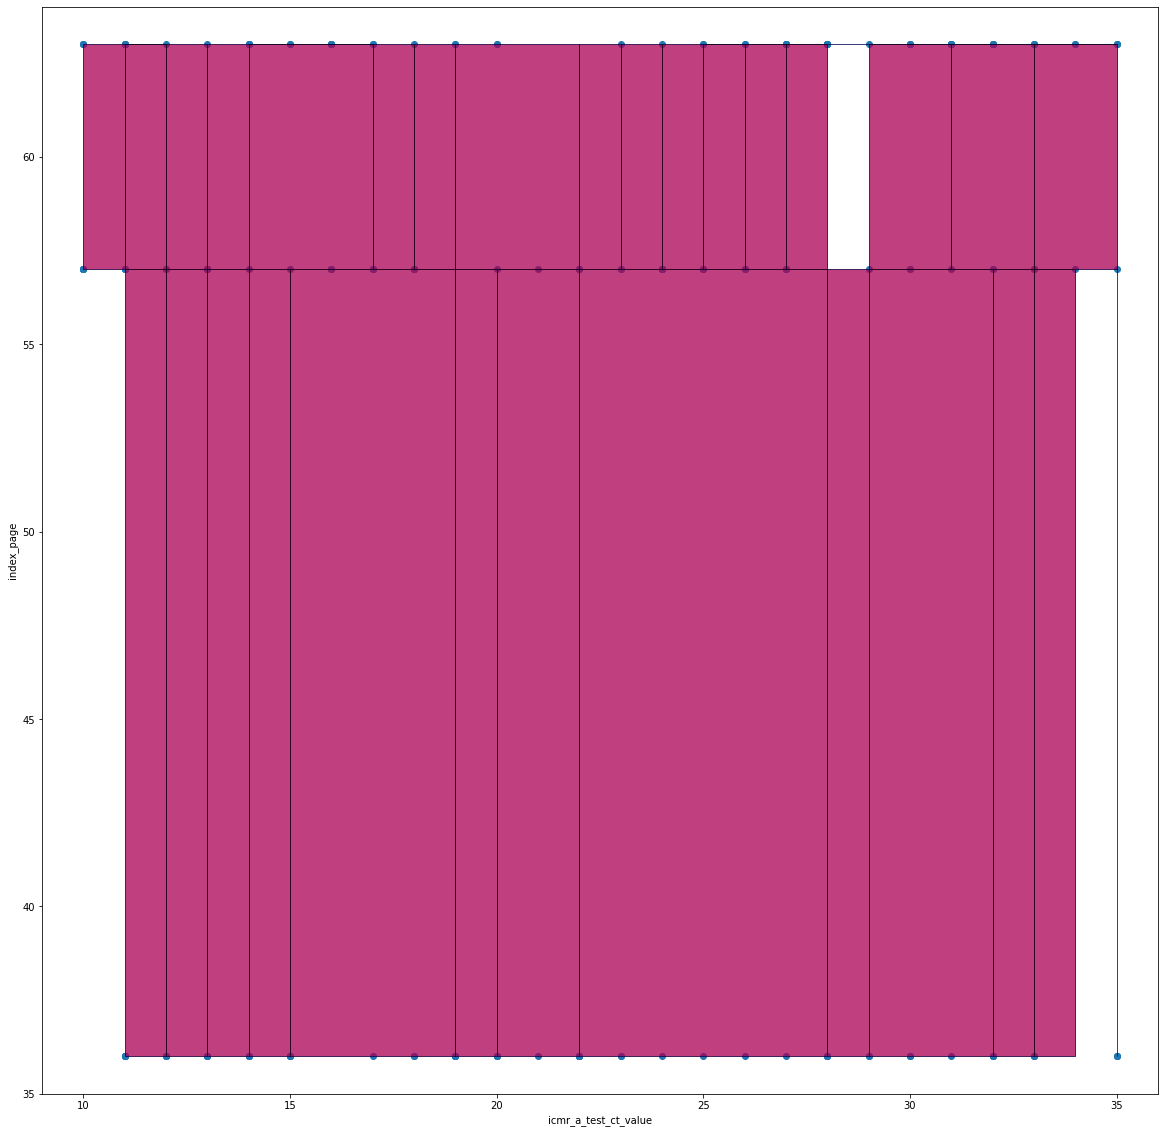

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(sandbox_icmr_covin_index_without_key_identifiers_pandas, ax, l_diverse_rects, column_x, column_y, edgecolor='b', facecolor='b')
plot_rects(sandbox_icmr_covin_index_without_key_identifiers_pandas, ax, rects, column_x, column_y, facecolor='r')
pl.scatter(sandbox_icmr_covin_index_without_key_identifiers_pandas[column_x], sandbox_icmr_covin_index_without_key_identifiers_pandas[column_y])
#pl.show()
# Saving figure by changing parameter values
pl.savefig("sandbox_icmr_covin_index_without_key_identifiers_ldiversity.png", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [ ]:
# We build an anonymized dataset from the l-diverse partitions
sandbox_icmr_covin_index_without_key_identifiers_ldiversity_dataset = build_anonymized_dataset(sandbox_icmr_covin_index_without_key_identifiers_pandas, finished_l_diverse_partitions, feature_columns, sensitive_column)
sandbox_icmr_covin_index_without_key_identifiers_ldiversity_dataset.to_csv('sandbox_icmr_covin_index_without_key_identifiers_ldiversity_dataset.csv')

Finished 1 partitions...


In [ ]:
# How l-diversity improves the anonymity of our dataset
sandbox_icmr_covin_index_without_key_identifiers_ldiversity_dataset.sort_values([column_x, column_y, sensitive_column])

,icmr_a_test_ct_value,index_page,cowin_age,count
24,10.0,59.25,24,1
25,10.0,59.25,37,1
26,10.0,59.25,41,1
27,10.0,59.25,43,1
28,10.0,59.25,68,1
...,...,...,...,...
194,34.6,63.00,63,1
195,34.6,63.00,73,1
143,35.0,36.00,18,1
144,35.0,36.00,61,1


#**Data Analysis Across the Base and Derived Data Sets**

In [ ]:
#sandbox_icmr_anon.join(sandbox_hbms_anon, on=["pk_icmrno_hashed"], how='inner')
sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_spark= spark.createDataFrame(sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset)
sandbox_icmr_covin_index_without_key_identifiers_ldiversity_spark= spark.createDataFrame(sandbox_icmr_covin_index_without_key_identifiers_ldiversity_dataset)


In [ ]:
sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_spark.show()
sandbox_icmr_covin_index_without_key_identifiers_ldiversity_spark.show()

+--------------------+----------+---------+-----+
|icmr_a_test_ct_value|index_page|cowin_age|count|
+--------------------+----------+---------+-----+
|  23.142857142857142|      36.0|       26|    2|
|  23.142857142857142|      36.0|       32|    1|
|  23.142857142857142|      36.0|       35|    1|
|  23.142857142857142|      36.0|       38|    1|
|  23.142857142857142|      36.0|       42|    1|
|  23.142857142857142|      36.0|       65|    1|
|  23.142857142857142|      36.0|       71|    1|
|  23.142857142857142|      36.0|       80|    1|
|  23.142857142857142|      36.0|       82|    1|
|  23.142857142857142|      36.0|       87|    1|
|  23.142857142857142|      36.0|       89|    1|
|  23.142857142857142|      36.0|       90|    1|
|  23.142857142857142|      36.0|       93|    1|
|                11.0|      36.0|       20|    1|
|                11.0|      36.0|       45|    1|
|                11.0|      36.0|       48|    1|
|                11.0|      36.0|       69|    1|


In [ ]:

#primary_indexes_list=['pk_icmrno','pk_mobno','ref_srfno', 'ref_bucode','ref_pname')

'''
# Naming Columns for easier analysis sandbox_icmr_anon
for i in sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_spark.columns:
  if i not in primary_indexes_list:
    sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_spark = sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_spark.withColumnRenamed(i,'original_'+i)
sandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_spark.show()

'''


'''

sandbox_data_analysis_sensitivity = 

# Linking the Original & Kanon & Ldiversity Data Sets (Proof it works)

sandbox_icmr_anon.createOrReplaceTempView("ANON")
sandbox_hbsandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_sparkms_anon.createOrReplaceTempView("KANON")
sandbox_icmr_covin_index_without_key_identifiers_ldiversity_spark.createOrReplaceTempView("LDIVERSITY")

# icmr_a_icmr_test_type,icmr_a_icmr_test_result,icmr_a_test_ct_value,icmr_a_lab_id,icmr_a_sample_genetic_sequenced,icmr_a_sample_genetic_strain,icmr_pupdate

select_query = "select * from ICMR e, INDEX d, COWIN a " + "where e.pk_mobno_hashed == d.pk_mobno_hashed and e.pk_mobno_hashed == a.pk_mobno_hashed"
sandbox_icmr_covin_index_anon=spark.sql(select_query).cache()


sandbox_icmr_covin_index_anon.toPandas().to_csv('sandbox_poc_v1_icmr_covin_index_anon.csv')

'''

'\n\nsandbox_data_analysis_sensitivity = \n\n# Linking the Original & Kanon & Ldiversity Data Sets (Proof it works)\n\nsandbox_icmr_anon.createOrReplaceTempView("ANON")\nsandbox_hbsandbox_icmr_covin_index_without_key_identifiers_kanon_dataset_sparkms_anon.createOrReplaceTempView("KANON")\nsandbox_icmr_covin_index_without_key_identifiers_ldiversity_spark.createOrReplaceTempView("LDIVERSITY")\n\n# icmr_a_icmr_test_type,icmr_a_icmr_test_result,icmr_a_test_ct_value,icmr_a_lab_id,icmr_a_sample_genetic_sequenced,icmr_a_sample_genetic_strain,icmr_pupdate\n\nselect_query = "select * from ICMR e, INDEX d, COWIN a " + "where e.pk_mobno_hashed == d.pk_mobno_hashed and e.pk_mobno_hashed == a.pk_mobno_hashed"\nsandbox_icmr_covin_index_anon=spark.sql(select_query).cache()\n\n\nsandbox_icmr_covin_index_anon.toPandas().to_csv(\'sandbox_poc_v1_icmr_covin_index_anon.csv\')\n\n'

#**Overall